# Live Train and Decode
### In this example we showcase the nm_train and its Trainer class which allows users to train simple models
### For this example we use the following additional tools:
- The OpenBCI ExG Headphones (https://github.com/MKnierim/openbci-headphones)
- The OpenBCI GUI (https://docs.openbci.com/Software/OpenBCISoftware/GUIDocs/)

You could run this example without any other applications by just starting a stream from any other LSL Source (like the nm_mnelsl_generator)

___
## First let's setup the OpenBCI GUI and a lsl stream.
#### To do so, make sure to first run a stream and then open the Networking section. Here you need to select the LSL Protocol and turn the Data Type to 'TimeSeriesRaw'.

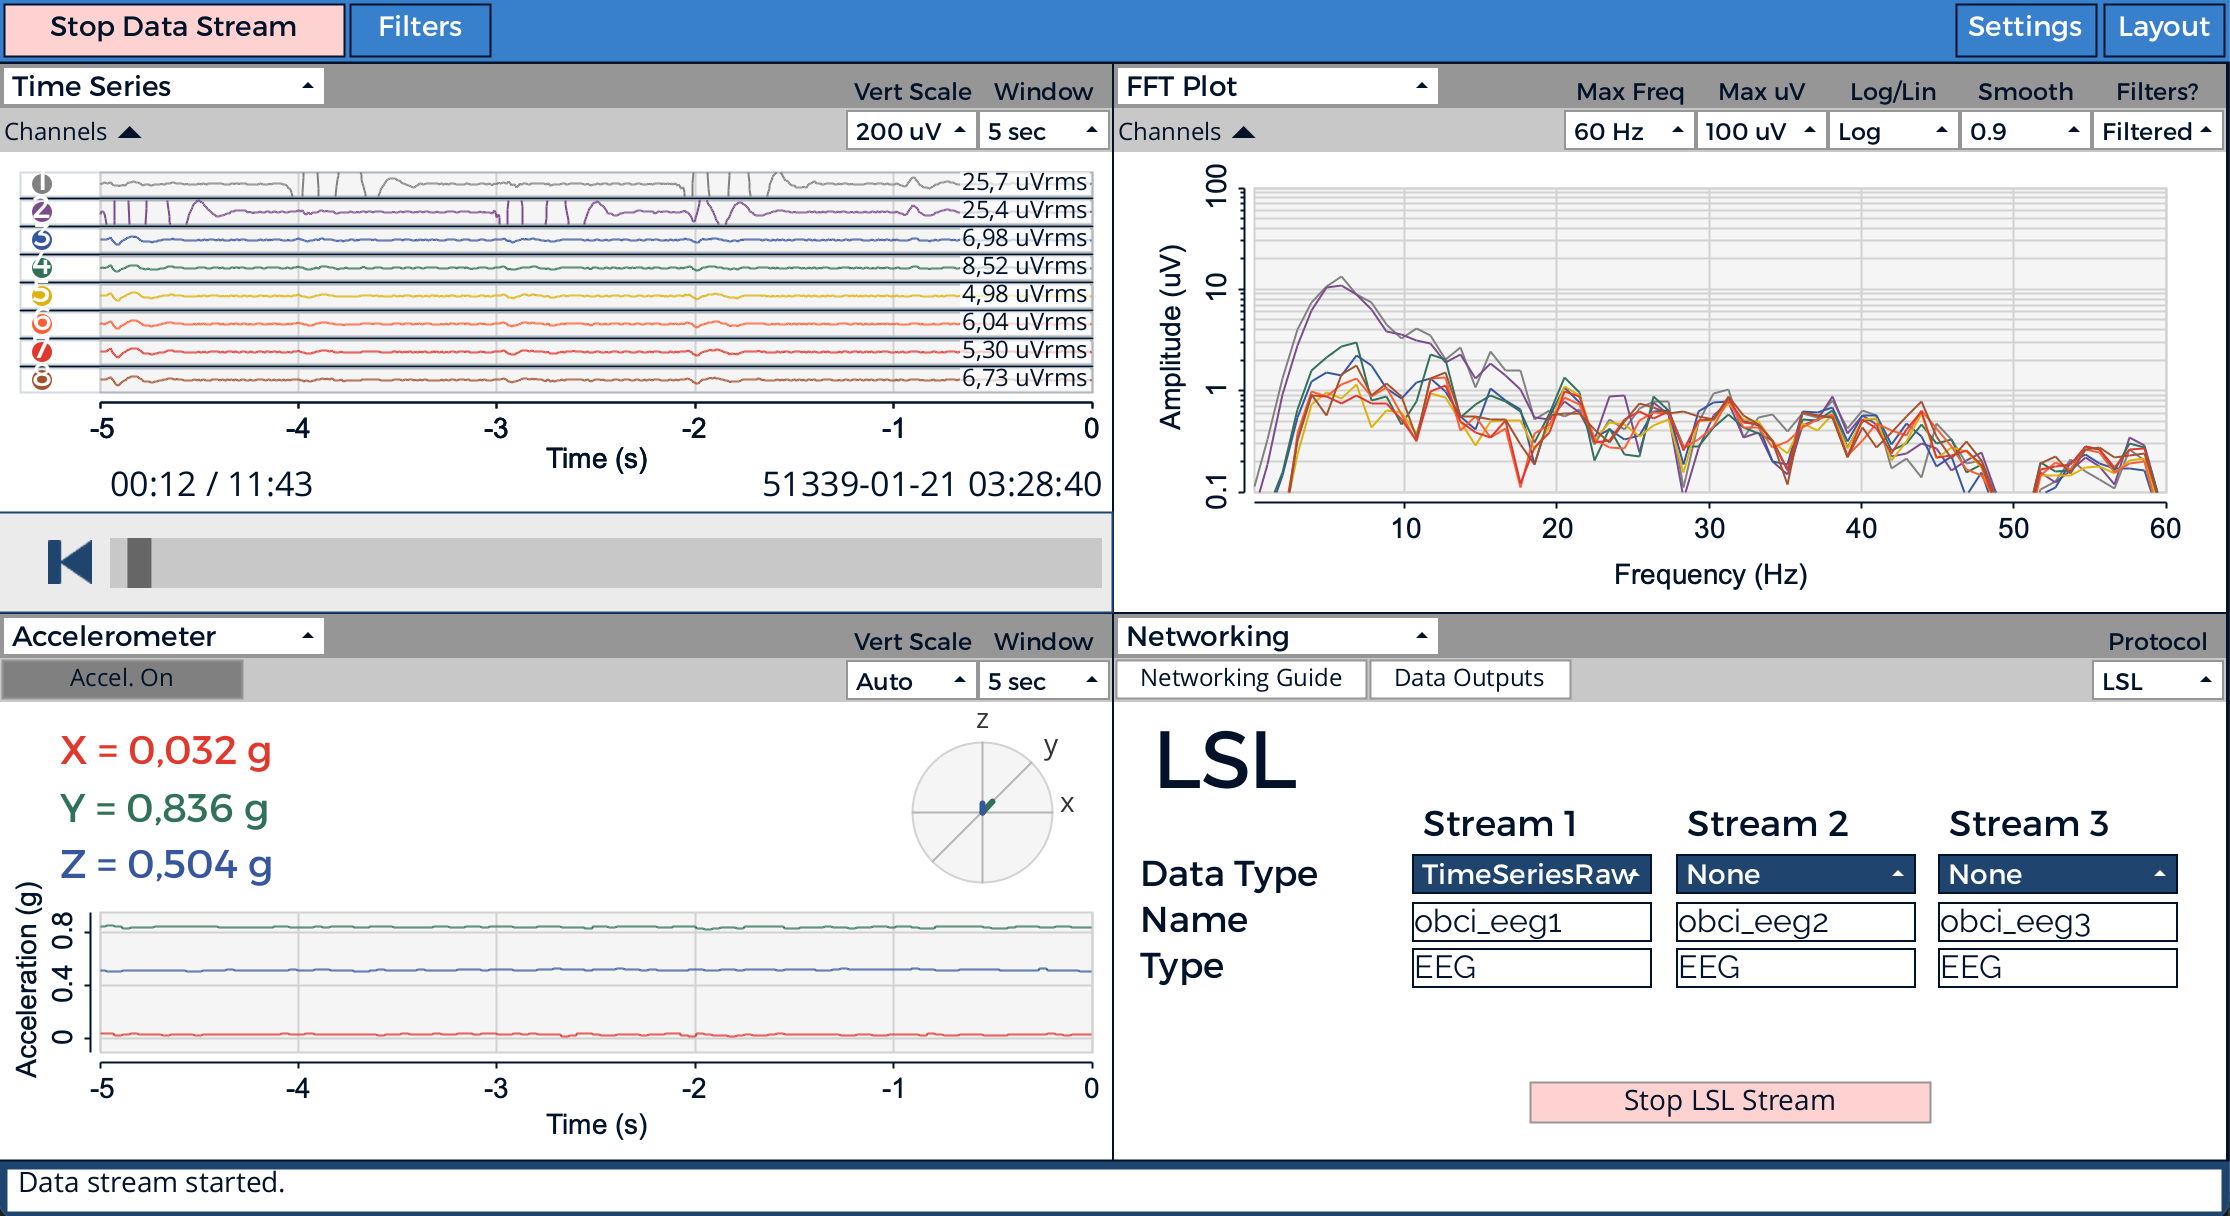

In [2]:
from sklearn.ensemble import RandomForestClassifier
from py_neuromodulation import nm_train
from py_neuromodulation import (nm_settings, nm_define_nmchannels, nm_mnelsl_generator, nm_stream_offline)
from mne_lsl.lsl import resolve_streams


### Let's connect to the stream

In [7]:
possible_streams = resolve_streams()
possible_streams

exg_stream = possible_streams[0]
print(f'Possible stream: {exg_stream}')

Possible stream: < sInfo 'obci_eeg1' >
  | Type: EEG
  | Sampling: 250.0 Hz
  | Number of channels: 8
  | Data type: <class 'numpy.float32'>
  | Source: openbcigui



### Looks like we found the OopenBCI stream. 
Great next let's define our stream to get the data and analyse it.

In [4]:
settings = nm_settings.get_default_settings()
settings["features"]["welch"] = False
settings["features"]["fft"] = True
settings["features"]["bursts"] = False
settings["features"]["sharpwave_analysis"] = False
settings["features"]["coherence"] = False

ch_names = []
ch_types = []
for i in range(exg_stream.n_channels):
    ch_names.append(f'ch{i}')
    ch_types.append(exg_stream.stype)

nm_channels = nm_define_nmchannels.set_channels(
    ch_names = ch_names,
    ch_types= ch_types,
    reference = "default",
    new_names = "default",
    used_types= ("eeg", "ecog", "dbs", "seeg"),
    target_keywords=["MOV_RIGHT"]
)

stream_name = exg_stream.name
stream = nm_stream_offline.Stream(sfreq=exg_stream.sfreq, nm_channels=nm_channels, settings=settings, verbose=True, line_noise=50)

### Next we setup the Trainer. 
For this very basic example we would like to train a teeth clench classifier.
As a model we choose a Random Forest Classifier

In [8]:
classes = ['relax', 'clench']
model = RandomForestClassifier(n_estimators=100, random_state=42)

trainer = nm_train.Trainer(stream=stream, stream_name=stream_name, classes = classes, model = model)
trainer.start()
trainer.app.exit()

py_neuromodulation:	Retrieving data from stream...
2024-06-07 14:44:19.249 ( 425.345s) [StreamWorker    ]             common.cpp:65    INFO| git:v1.16.0-1-gdad9c99d/branch:master/build:Release/compiler:AppleClang-13.1.6.13160021/link:SHARED
/Users/Sam/charite/py_neuro/py_neuromodulation/py_neuromodulation/nm_mnelsl_stream.py:41: RuntimeWarning: Something went wrong while reading the channel description. Defaulting to channel IDs and MNE-compatible stream type.
  self.stream = StreamLSL(name=stream_name, bufsize=2).connect(timeout=2)
py_neuromodulation:	Pull data - current time: 1717764260.524068
/Users/Sam/charite/py_neuro/py_neuromodulation/py_neuromodulation/nm_oscillatory.py:105: RuntimeWarning: Mean of empty slice
  np.nanmean(data)
py_neuromodulation:	Last batch took: 0.04 seconds
py_neuromodulation:	1.00 seconds of data processed
py_neuromodulation:	Pull data - current time: 1717764260.633379
/Users/Sam/charite/py_neuro/py_neuromodulation/py_neuromodulation/nm_oscillatory.py:105:

1


py_neuromodulation:	Retrieving data from stream...
/Users/Sam/charite/py_neuro/py_neuromodulation/py_neuromodulation/nm_mnelsl_stream.py:41: RuntimeWarning: Something went wrong while reading the channel description. Defaulting to channel IDs and MNE-compatible stream type.
  self.stream = StreamLSL(name=stream_name, bufsize=2).connect(timeout=2)
py_neuromodulation:	Pull data - current time: 1717764270.804348
/Users/Sam/charite/py_neuro/py_neuromodulation/py_neuromodulation/nm_oscillatory.py:105: RuntimeWarning: Mean of empty slice
  np.nanmean(data)
py_neuromodulation:	Last batch took: 0.00 seconds
py_neuromodulation:	1.00 seconds of data processed
py_neuromodulation:	Pull data - current time: 1717764270.91091
/Users/Sam/charite/py_neuro/py_neuromodulation/py_neuromodulation/nm_oscillatory.py:105: RuntimeWarning: Mean of empty slice
  np.nanmean(data)
/Users/Sam/charite/py_neuro/py_neuromodulation/py_neuromodulation/nm_normalization.py:157: RuntimeWarning: Mean of empty slice
  np.nan

0


py_neuromodulation:	Training model...
py_neuromodulation:	Shape of training data: (114, 98)


Accuracy: 0.7714285714285715
              precision    recall  f1-score   support

           0       0.90      0.56      0.69        16
           1       0.72      0.95      0.82        19

    accuracy                           0.77        35
   macro avg       0.81      0.75      0.76        35
weighted avg       0.80      0.77      0.76        35

